In [57]:
import warnings
warnings.simplefilter('ignore')
import gc

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt

#import mxnet as mx

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

#import vaex

# Data Analysis and Visualization
# import pandas_profiling

## command to see the memory usage
# df.info(memory_usage='deep')

%matplotlib inline
plt.style.use('seaborn')
warnings.filterwarnings('ignore')

In [7]:
import pandas as pd

names = pd.read_csv('./name.basics.tsv', sep='\t')

In [8]:
names.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0050419,tt0031983,tt0053137,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0038355,tt0071877,tt0037382"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0056404,tt0049189,tt0054452,tt0057345"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0080455,tt0072562,tt0078723,tt0077975"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0060827,tt0050976,tt0083922"


In [9]:
ratings = pd.read_csv('./title.ratings.tsv', sep='\t')

In [10]:
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1883
1,tt0000002,5.9,250
2,tt0000003,6.5,1667
3,tt0000004,5.8,163
4,tt0000005,6.2,2490


In [11]:
principals = pd.read_csv('./title.principals.tsv', sep = '\t')
principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N


In [12]:
episode = pd.read_csv('./title.episode.tsv', sep = '\t')
episode.head()

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0020666,tt15180956,1,2
1,tt0020829,tt15180956,1,1
2,tt0021166,tt15180956,1,3
3,tt0021612,tt15180956,2,2
4,tt0021655,tt15180956,2,5


In [13]:
crew = pd.read_csv('./title.crew.tsv', sep = '\t')
crew.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [58]:
basics = pd.read_csv('./title.basics.tsv', sep = '\t')
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [15]:
akas = pd.read_csv('./title.akas.tsv', sep = '\t')
akas.head()

/var/folders/7x/mknq0g2s07jdkg8524w7snh40000gn/T/ipykernel_41289/2507213360.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  akas = pd.read_csv('./title.akas.tsv', sep = '\t')


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0


In [16]:
akas.head(20)

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0
5,tt0000001,6,Carmencita,US,\N,imdbDisplay,\N,0
6,tt0000001,7,Carmencita,\N,\N,original,\N,1
7,tt0000001,8,カルメンチータ,JP,ja,imdbDisplay,\N,0
8,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1
9,tt0000002,2,Le clown et ses chiens,FR,\N,imdbDisplay,\N,0


## change genre to machine readable

In [59]:
genres = {}
def genre_tolist(genre):
    if genre:
        genre = str(genre)
        genre = genre.lower()
        genre = genre.split(',')
        for x in genre:
            if x not in genres:
                genres[x] = 1
            else:
                genres[x] += 1
    return genre

In [60]:
basics['genres'] = basics['genres'].apply(genre_tolist)

In [61]:
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"[documentary, short]"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"[animation, short]"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"[animation, comedy, romance]"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"[animation, short]"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"[comedy, short]"


In [62]:
genres

{'documentary': 849850,
 'short': 1005867,
 'animation': 462305,
 'comedy': 1837864,
 'romance': 802699,
 'sport': 211957,
 'news': 788040,
 'drama': 2506695,
 'fantasy': 186059,
 'horror': 160826,
 'biography': 97666,
 'music': 363656,
 'war': 31183,
 'crime': 371184,
 'western': 29114,
 'family': 664041,
 'adventure': 351516,
 'action': 357656,
 'history': 129523,
 'mystery': 174823,
 '\\n': 408910,
 'sci-fi': 100822,
 'musical': 82814,
 'thriller': 147564,
 'film-noir': 774,
 'talk-show': 1059689,
 'game-show': 322555,
 'reality-tv': 485068,
 'adult': 274668,
 'nan': 10}

It looks almost all genres (except 'nan' and '\\n') make sense and have good amount of support.
So we make a column for each of them.

In [63]:
del genres['\\n']
del genres['nan']

In [67]:
basics = basics[~basics.genres.isin(['\\n'])]
basics = basics[~basics.genres.isin(['nan'])]

In [68]:
genres_copy = genres.copy()
for x in genres_copy:
    genres_copy[x] = []

In [69]:
for index, row in basics.iterrows():
    current = row['genres']
    for key in genres_copy:
        if key in current:
            genres_copy[key].append(1)
        else:
            genres_copy[key].append(0)

In [70]:
for key in genres_copy:
    basics[key] = genres_copy[key]
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,documentary,...,history,mystery,sci-fi,musical,thriller,film-noir,talk-show,game-show,reality-tv,adult
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"[documentary, short]",1,...,0,0,0,0,0,0,0,0,0,0
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"[animation, short]",0,...,0,0,0,0,0,0,0,0,0,0
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"[animation, comedy, romance]",0,...,0,0,0,0,0,0,0,0,0,0
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"[animation, short]",0,...,0,0,0,0,0,0,0,0,0,0
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"[comedy, short]",0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
# We drop some columns from basics.
# It looks `titleType`, `originalTitle`, `endYear` are not informative
# either due to lack of info or info redundancy.
# So we create a sub dataframe by dropping these columns.
# We also drop the original `genres` column
# since we now have our matrix representation of it.
# since `runtimeMinutes` is kind of covered by 
# whether the genre includes `short` or not
# we are gonna ignore it as well

basics_archive = basics.copy()
basics = basics.drop(['titleType', 'originalTitle', 'endYear', 'genres', 'runtimeMinutes'], axis = 1)

In [74]:
basics.head()

,tconst,primaryTitle,isAdult,startYear,documentary,short,animation,comedy,romance,sport,...,history,mystery,sci-fi,musical,thriller,film-noir,talk-show,game-show,reality-tv,adult
0,tt0000001,Carmencita,0,1894,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0000002,Le clown et ses chiens,0,1892,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0000003,Pauvre Pierrot,0,1892,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0000004,Un bon bock,0,1892,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0000005,Blacksmith Scene,0,1893,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
basics.isna().sum()

tconst           0
primaryTitle    11
isAdult          0
startYear        0
documentary      0
short            0
animation        0
comedy           0
romance          0
sport            0
news             0
drama            0
fantasy          0
horror           0
biography        0
music            0
war              0
crime            0
western          0
family           0
adventure        0
action           0
history          0
mystery          0
sci-fi           0
musical          0
thriller         0
film-noir        0
talk-show        0
game-show        0
reality-tv       0
adult            0
dtype: int64

In [79]:
basics.dropna()

,tconst,primaryTitle,isAdult,startYear,documentary,short,animation,comedy,romance,sport,...,history,mystery,sci-fi,musical,thriller,film-noir,talk-show,game-show,reality-tv,adult
0,tt0000001,Carmencita,0,1894,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tt0000002,Le clown et ses chiens,0,1892,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,tt0000003,Pauvre Pierrot,0,1892,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0000004,Un bon bock,0,1892,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,tt0000005,Blacksmith Scene,0,1893,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8961731,tt9916848,Episode #3.17,0,2010,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8961732,tt9916850,Episode #3.19,0,2010,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8961733,tt9916852,Episode #3.20,0,2010,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8961734,tt9916856,The Wind,0,2015,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Take a look at the ratings table

In [77]:
ratings.shape

(1249576, 3)

In [80]:
ratings.isna().sum()

tconst           0
averageRating    0
numVotes         0
dtype: int64

Text(0, 0.5, 'average rating of movie')

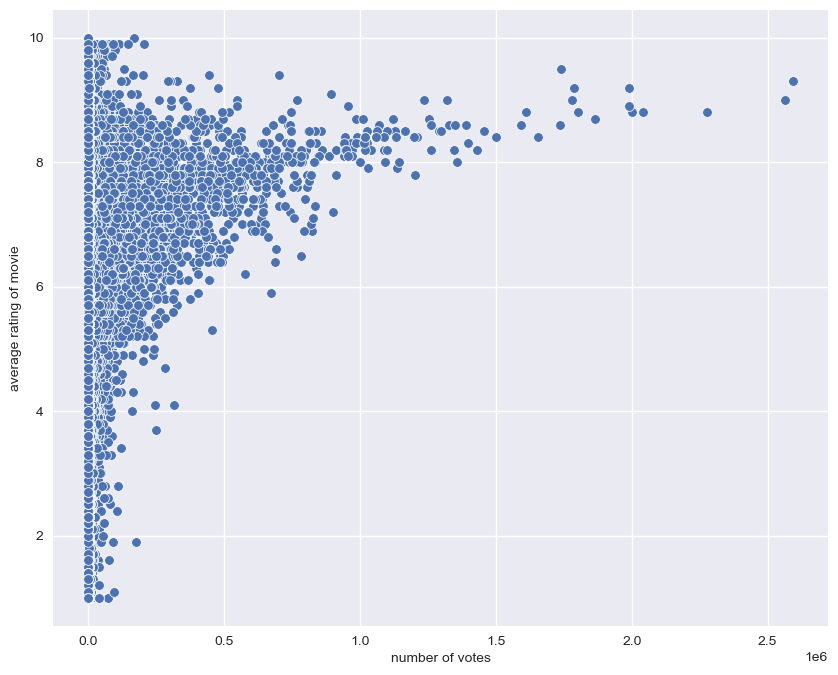

In [81]:
# and check out if there's a relationship between number of votes and the average rating
plt.figure(figsize = (10,8))
sns.scatterplot(x = ratings['numVotes'], y = ratings['averageRating'])
plt.xlabel('number of votes')
plt.ylabel('average rating of movie')

In [84]:
Q1 = ratings.quantile(0.1)
Q3 = ratings.quantile(0.75)
Q1

averageRating    5.1
numVotes         7.0
Name: 0.1, dtype: float64

In [85]:
# when number of votes is too low, there is in general no control over the ratings
# so we delete records that have < 7 votes

ratings = ratings.drop(ratings[(ratings['numVotes'] < 7)].index)

In [86]:
ratings.shape

(1152989, 3)

## merge basics and ratings

In [87]:
basics = basics.merge(ratings, on = 'tconst')

In [88]:
basics.shape

(1152989, 34)

In [89]:
#  convert the year value (string) to integer for easy scaling and comparison
basics = basics[(basics['startYear']!='\\N')]
basics['startYear'] = basics['startYear'].astype(int)

In [91]:
basics['isAdult'] = basics['isAdult'].astype(int)

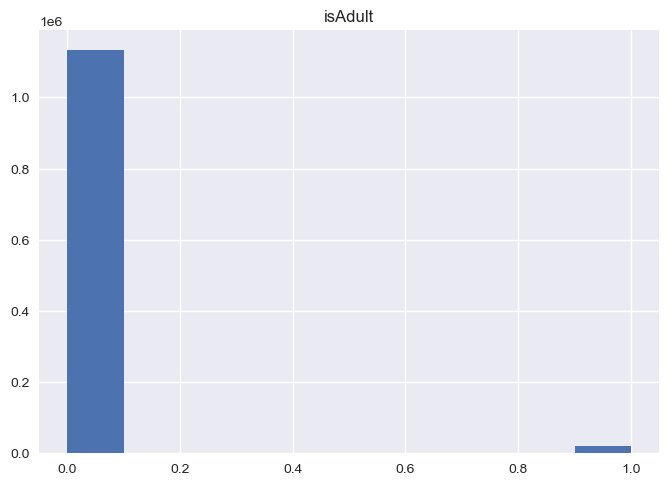

In [92]:
hist = basics.hist(column = 'isAdult')

In [93]:
from collections import Counter

Counter(basics['isAdult'])

Counter({0: 1133145, 1: 19633})

It looks adult movies are covered by the `adult` genre. We drop the `isAdult` column.

In [94]:
basics = basics.drop(['isAdult'], axis = 1)

## turn our data to numerical and scaled 

In [97]:
# We can now set the ‘titleid and title’ 
# as the index and the rest of the numerical 
# features become the attributes of each unique title.
numerical = basics
numerical.index = numerical['tconst'] + " " + numerical['primaryTitle']
numerical.drop(['tconst','primaryTitle', 'tconst'],axis=1,inplace=True)
numerical.head()

,startYear,documentary,short,animation,comedy,romance,sport,news,drama,fantasy,...,sci-fi,musical,thriller,film-noir,talk-show,game-show,reality-tv,adult,averageRating,numVotes
tt0000001 Carmencita,1894,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5.7,1883
tt0000002 Le clown et ses chiens,1892,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5.9,250
tt0000003 Pauvre Pierrot,1892,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,6.5,1667
tt0000004 Un bon bock,1892,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5.8,163
tt0000005 Blacksmith Scene,1893,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6.2,2490


In [98]:
# Data Scaling – We need to standardize the scaling of the numerical columns 
# in order to use any distance based analytical methods so that we can 
# compare the relative distances between different feature columns. We can 
# use minmaxscaler to transform the numerical columns so that they also 
# fall between 0 and 1.
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(numerical))
df.columns = numerical.columns
df.index = numerical.index
df.head()

,startYear,documentary,short,animation,comedy,romance,sport,news,drama,fantasy,...,sci-fi,musical,thriller,film-noir,talk-show,game-show,reality-tv,adult,averageRating,numVotes
tt0000001 Carmencita,0.135135,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.522222,0.000724
tt0000002 Le clown et ses chiens,0.121622,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.544444,0.000094
tt0000003 Pauvre Pierrot,0.121622,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.611111,0.000640
tt0000004 Un bon bock,0.121622,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.533333,0.000060
tt0000005 Blacksmith Scene,0.128378,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.577778,0.000958


## try kmeans to cluster

In [113]:
wcss = []
for i in range(1, 40):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

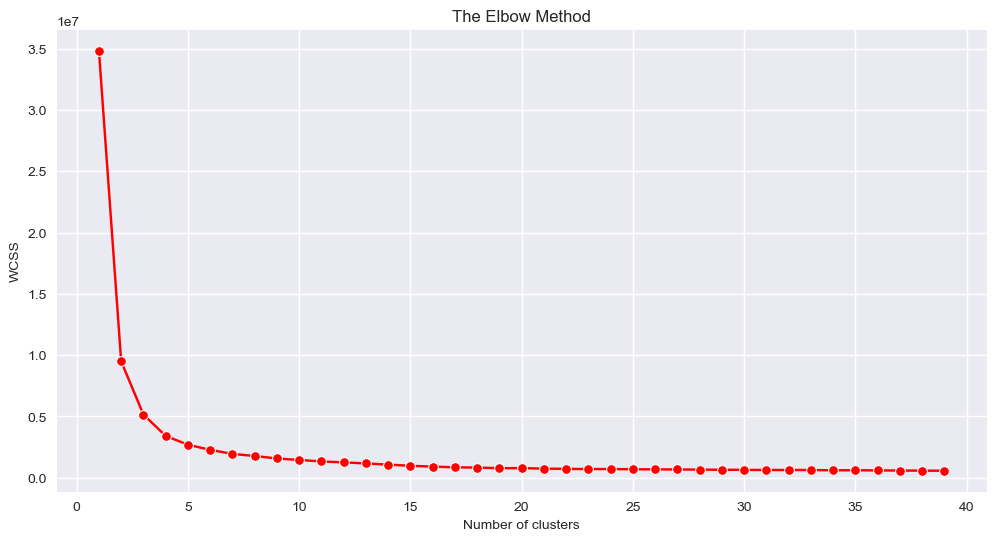

In [114]:
plt.figure(figsize=(12,6))
sns.lineplot(x = np.arange(1, 40), y = wcss, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [115]:
# it looks 15 is the elbow
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 15, init = 'k-means++', random_state = 42)
cluster_labels = kmeans.fit_predict(df)

In [116]:
pd.DataFrame(cluster_labels)[0].value_counts()

8     165648
9     161628
3     115358
4      95656
2      82631
7      75165
12     63538
6      60213
11     59600
1      57254
14     48419
5      47471
13     46605
0      41475
10     32117
Name: 0, dtype: int64

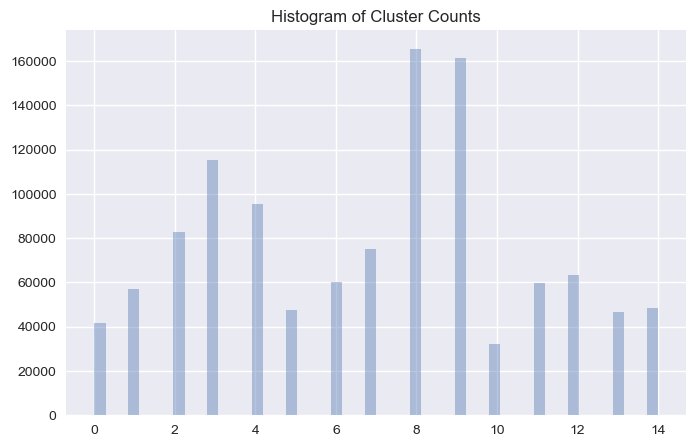

In [117]:
ax=plt.subplots(figsize=(8,5))
ax=sns.distplot(cluster_labels, kde=False)
title="Histogram of Cluster Counts"
ax.set_title(title, fontsize=12)
plt.show()

In [118]:
prediction_df = df
prediction_df['cluster_labels']=list(map(int, cluster_labels))
prediction_df.head()

,startYear,documentary,short,animation,comedy,romance,sport,news,drama,fantasy,...,musical,thriller,film-noir,talk-show,game-show,reality-tv,adult,averageRating,numVotes,cluster_labels
tt0000001 Carmencita,0.135135,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.522222,0.000724,2
tt0000002 Le clown et ses chiens,0.121622,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.544444,0.000094,1
tt0000003 Pauvre Pierrot,0.121622,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.611111,0.000640,0
tt0000004 Un bon bock,0.121622,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.533333,0.000060,1
tt0000005 Blacksmith Scene,0.128378,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.577778,0.000958,2


## take 5 random samples from cluster 0 and see how similar they are

In [119]:
b = pd.read_csv('./title.basics.tsv', sep = '\t')
r = pd.read_csv('./title.ratings.tsv', sep = '\t')
df_raw = b.merge(r, on = 'tconst')

In [120]:
df0 = prediction_df[(prediction_df['cluster_labels'] == 0)]

In [121]:
df0.shape

(41475, 32)

In [126]:
sample0 = df0.sample(5)
sample0

,startYear,documentary,short,animation,comedy,romance,sport,news,drama,fantasy,...,musical,thriller,film-noir,talk-show,game-show,reality-tv,adult,averageRating,numVotes,cluster_labels
tt3341170 Sapore di te,0.945946,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.388889,0.000122,0
"tt13310790 Always Have, Always Will",0.993243,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.800000,0.000007,0
tt0020241 One Hysterical Night,0.371622,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.444444,0.000003,0
tt0969277 I Was a Swiss Banker,0.898649,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.355556,0.000054,0
tt0637108 Love and the Girlish Groom/Love and the New You/Love and the Oldlyweds/Love and the Wishing Star,0.662162,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.822222,0.000002,0


In [128]:
l0 = []
for _ in sample0.index:
    l0.append(_.split()[0])
l0

['tt3341170', 'tt13310790', 'tt0020241', 'tt0969277', 'tt0637108']

In [130]:
raw_sample0 = df_raw[df_raw['tconst'].isin(l0)]
raw_sample0

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
6289,tt0020241,movie,One Hysterical Night,One Hysterical Night,0,1929,\N,75,"Comedy,Romance",5.0,15
326684,tt0637108,tvEpisode,Love and the Girlish Groom/Love and the New Yo...,Love and the Girlish Groom/Love and the New Yo...,0,1972,\N,30,"Comedy,Romance",8.4,12
443353,tt0969277,movie,I Was a Swiss Banker,I Was a Swiss Banker,0,2007,\N,75,Romance,4.2,148
613565,tt13310790,tvSeries,"Always Have, Always Will","Always Have, Always Will",0,2021,\N,\N,Romance,8.2,25
918845,tt3341170,movie,Sapore di te,Sapore di te,0,2014,\N,101,"Comedy,Romance",4.5,323


The `genres` looks fine but `averageRating` is not close enough. Need to add additional weight on rating.

## redo kmeans

In [144]:
df_redo = df
l = df['averageRating'].tolist()
df_redo['averageRating1'] = l
df_redo['averageRating2'] = l
df_redo = df_redo.drop(['cluster_labels'], axis = 1)
df_redo.head()

,startYear,documentary,short,animation,comedy,romance,sport,news,drama,fantasy,...,thriller,film-noir,talk-show,game-show,reality-tv,adult,averageRating,numVotes,averageRating1,averageRating2
tt0000001 Carmencita,0.135135,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.522222,0.000724,0.522222,0.522222
tt0000002 Le clown et ses chiens,0.121622,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.544444,0.000094,0.544444,0.544444
tt0000003 Pauvre Pierrot,0.121622,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.611111,0.000640,0.611111,0.611111
tt0000004 Un bon bock,0.121622,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.533333,0.000060,0.533333,0.533333
tt0000005 Blacksmith Scene,0.128378,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.577778,0.000958,0.577778,0.577778


In [145]:
# try more clusters
# Fitting K-Means to the dataset
kmeans2 = KMeans(n_clusters = 40, init = 'k-means++', random_state = 42)
cluster_labels = kmeans2.fit_predict(df_redo)

In [146]:
pd.DataFrame(cluster_labels)[0].value_counts()

8     111840
1     105111
4      97838
6      42577
29     38921
3      38744
23     38054
35     37561
18     33968
22     32010
13     29587
31     29245
26     28808
7      28599
39     27754
15     25139
25     24332
21     23630
11     23170
34     22252
36     21272
19     20962
37     20880
30     20031
12     19986
10     19957
0      17392
24     17260
38     16135
17     15766
5      14659
14     14186
32     14052
28     13885
9      12711
33     12700
16     12079
20     10981
27      9650
2       9094
Name: 0, dtype: int64

In [147]:
prediction_df_redo = df_redo
prediction_df_redo['cluster_labels']=list(map(int, cluster_labels))
df0_redo = prediction_df_redo[(prediction_df_redo['cluster_labels'] == 0)]
sample0_redo = df0_redo.sample(5)
sample0_redo

,startYear,documentary,short,animation,comedy,romance,sport,news,drama,fantasy,...,film-noir,talk-show,game-show,reality-tv,adult,averageRating,numVotes,averageRating1,averageRating2,cluster_labels
tt5917524 Lubed,0.959459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.688889,0.000012,0.688889,0.688889,0
tt0382620 Cruisin Jennaville,0.871622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.700000,0.000016,0.700000,0.700000,0
tt0382285 The Seven Deadly Sins: Sloth,0.858108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.644444,0.000002,0.644444,0.644444,0
tt1431237 Double Decker Sandwich 13,0.912162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.266667,0.000000,0.266667,0.266667,0
tt0124475 Entangled,0.824324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.511111,0.000036,0.511111,0.511111,0


### take 5 random samples from class 0

In [148]:
l0 = []
for _ in sample0_redo.index:
    l0.append(_.split()[0])
raw_sample0_redo = df_raw[df_raw['tconst'].isin(l0)]
raw_sample0_redo

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
92751,tt0124475,video,Entangled,Entangled,1,1996,\N,\N,Adult,5.6,100
215161,tt0382285,video,The Seven Deadly Sins: Sloth,The Seven Deadly Sins: Sloth,1,2001,\N,90,Adult,6.8,12
215330,tt0382620,video,Cruisin Jennaville,Cruisin Jennaville,1,2003,\N,150,Adult,7.3,48
657330,tt1431237,video,Double Decker Sandwich 13,Double Decker Sandwich 13,1,2009,\N,\N,Adult,3.4,7
1077271,tt5917524,tvSeries,Lubed,Lubed,1,2016,\N,\N,Adult,7.2,37


It looks like the Cluster 0 consists of the adult movies. Let's look at some other labels.

### take 5 random samples from class 1, 2, 3, 4, 5

In [149]:
# label 1
df1_redo = prediction_df_redo[(prediction_df_redo['cluster_labels'] == 1)]
sample1_redo = df1_redo.sample(5)
l1 = []
for _ in sample1_redo.index:
    l1.append(_.split()[0])
raw_sample1_redo = df_raw[df_raw['tconst'].isin(l1)]
raw_sample1_redo

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
210406,tt0371835,tvMovie,Ghost Cat,Mrs. Ashboro's Cat,0,2004,\N,90,Drama,5.4,558
757929,tt1772940,video,Kiss the Bride,Kiss the Bride,0,2010,\N,80,Drama,3.4,117
773864,tt1849171,movie,Together We're Heavy,Together We're Heavy,0,2009,\N,92,Drama,3.9,10
1238491,tt9555526,tvEpisode,Episode #1.1,Episode #1.1,0,2009,\N,\N,Drama,8.8,21
1249034,tt9901452,tvEpisode,Episode #1.26,Episode #1.26,0,2019,\N,\N,Drama,9.6,9


In [150]:
# label 2
df2_redo = prediction_df_redo[(prediction_df_redo['cluster_labels'] == 2)]
sample2_redo = df2_redo.sample(5)
l2 = []
for _ in sample2_redo.index:
    l2.append(_.split()[0])
raw_sample2_redo = df_raw[df_raw['tconst'].isin(l2)]
raw_sample2_redo

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
286571,tt0548220,tvEpisode,Episode #40.74,Episode #40.74,0,1999,\N,30,Game-Show,6.6,7
534542,tt1160431,tvSeries,Ber nebo neber,Ber nebo neber,0,2007,\N,\N,Game-Show,1.8,8
610032,tt1323561,tvSeries,Passaparola,Passaparola,0,1999,2008,75,Game-Show,6.1,9
780123,tt18814468,tvEpisode,Episode #5.119,Episode #5.119,0,2022,\N,\N,Game-Show,7.4,7
796593,tt1987246,tvEpisode,Episode #10.5,Episode #10.5,0,2011,\N,\N,"Comedy,Game-Show",7.1,17


In [151]:
# label 3
df3_redo = prediction_df_redo[(prediction_df_redo['cluster_labels'] == 3)]
sample3_redo = df3_redo.sample(5)
l3 = []
for _ in sample3_redo.index:
    l3.append(_.split()[0])
raw_sample3_redo = df_raw[df_raw['tconst'].isin(l3)]
raw_sample3_redo

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
425405,tt0900163,tvEpisode,Gilmore's Notebook,Gilmore's Notebook,0,2002,\N,25,"Action,Adventure,Animation",8.4,8
513379,tt11178036,tvEpisode,Sad Voices and Black Book,Sad Voices and Black Book,0,2019,\N,23,"Action,Animation,Fantasy",7.5,11
803065,tt2033547,tvEpisode,The Purge,The Purge,0,2011,\N,23,"Action,Adventure,Animation",7.9,196
835146,tt2255548,tvEpisode,Prelude to the Impending Fight: The Shadow of ...,Prelude to the Impending Fight: The Shadow of ...,0,1996,\N,23,"Action,Adventure,Animation",8.4,143
998565,tt4603502,tvEpisode,Story for Steven,Story for Steven,0,2015,\N,11,"Action,Adventure,Animation",8.9,1392


In [152]:
# label 4
df4_redo = prediction_df_redo[(prediction_df_redo['cluster_labels'] == 4)]
sample4_redo = df4_redo.sample(5)
l4 = []
for _ in sample4_redo.index:
    l4.append(_.split()[0])
raw_sample4_redo = df_raw[df_raw['tconst'].isin(l4)]
raw_sample4_redo

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
227318,tt0409429,tvMovie,Van Helsing: The Man and the Monsters,Van Helsing: The Man and the Monsters,0,2004,\N,60,Documentary,6.9,70
552482,tt1196112,movie,Witch Hunt,Witch Hunt,0,2008,\N,91,"Crime,Documentary",7.4,1038
597846,tt12985934,tvEpisode,Overparenting in Japan,Overparenting in Japan,0,2020,\N,42,"Comedy,Documentary",8.0,8
1083222,tt6015480,tvEpisode,Inside a Monster Black Hole,Inside a Monster Black Hole,0,2016,\N,42,Documentary,8.7,7
1118252,tt6616102,tvEpisode,Film in the Philippines,Film in the Philippines,0,1983,\N,39,Documentary,8.0,7


In [153]:
# label 5
df5_redo = prediction_df_redo[(prediction_df_redo['cluster_labels'] == 5)]
sample5_redo = df5_redo.sample(5)
l5 = []
for _ in sample5_redo.index:
    l5.append(_.split()[0])
raw_sample5_redo = df_raw[df_raw['tconst'].isin(l5)]
raw_sample5_redo

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
14042,tt0030729,short,Self Control,Self Control,0,1938,\N,9,"Animation,Comedy,Family",6.7,703
15265,tt0032243,short,The Bear's Tale,The Bear's Tale,0,1940,\N,9,"Animation,Comedy,Family",6.9,408
106911,tt0151993,short,Plane Dumb,Plane Dumb,0,1932,\N,7,"Animation,Comedy,Family",4.1,138
427556,tt0908957,tvEpisode,Best Enemies,Best Enemies,0,2001,\N,\N,"Animation,Comedy,Family",7.1,20
1178161,tt7950268,tvEpisode,Mortal Frenemies,Mortal Frenemies,0,2018,\N,\N,"Animation,Comedy,Family",9.1,17


It makes sense that ratings still vary a lot within a single cluster, by the way we scale the data. We put this aside for now.

In [132]:
pca = PCA(n_components = 8)

In [133]:
pca.fit(df)

PCA(n_components=8)